In [2]:
NAME = "DUCROCQ Romain"

# Homework Week 5 - Questions
# SQLite, join and merge tables

In [3]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import pymysql
import sqlite3

In [4]:
conn = sqlite3.connect('data/chinook.db')

In [5]:
QUERY = "SELECT * FROM sqlite_master WHERE type = 'table'"
df = pd.read_sql(QUERY, conn)
df

,type,name,tbl_name,rootpage,sql
0,table,albums,albums,2,"CREATE TABLE ""albums""\r\n(\r\n [AlbumId] IN..."
1,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
2,table,artists,artists,4,"CREATE TABLE ""artists""\r\n(\r\n [ArtistId] ..."
3,table,customers,customers,5,"CREATE TABLE ""customers""\r\n(\r\n [Customer..."
4,table,employees,employees,8,"CREATE TABLE ""employees""\r\n(\r\n [Employee..."
5,table,genres,genres,10,"CREATE TABLE ""genres""\r\n(\r\n [GenreId] IN..."
6,table,invoices,invoices,11,"CREATE TABLE ""invoices""\r\n(\r\n [InvoiceId..."
7,table,invoice_items,invoice_items,13,"CREATE TABLE ""invoice_items""\r\n(\r\n [Invo..."
8,table,media_types,media_types,15,"CREATE TABLE ""media_types""\r\n(\r\n [MediaT..."
9,table,playlists,playlists,16,"CREATE TABLE ""playlists""\r\n(\r\n [Playlist..."


## Save the artists, albums and tracks tables in three different dataframes with clear names

In [6]:
artists = pd.read_sql("SELECT * FROM artists", conn)
artists

,ArtistId,Name
0,1,AC/DC
1,2,Accept
2,3,Aerosmith
3,4,Alanis Morissette
4,5,Alice In Chains
...,...,...
270,271,"Mela Tenenbaum, Pro Musica Prague & Richard Kapp"
271,272,Emerson String Quartet
272,273,"C. Monteverdi, Nigel Rogers - Chiaroscuro; Lon..."
273,274,Nash Ensemble


In [7]:
albums = pd.read_sql("SELECT * FROM albums", conn)
albums

,AlbumId,Title,ArtistId
0,1,For Those About To Rock We Salute You,1
1,2,Balls to the Wall,2
2,3,Restless and Wild,2
3,4,Let There Be Rock,1
4,5,Big Ones,3
...,...,...,...
342,343,Respighi:Pines of Rome,226
343,344,Schubert: The Late String Quartets & String Qu...,272
344,345,Monteverdi: L'Orfeo,273
345,346,Mozart: Chamber Music,274


In [8]:
tracks = pd.read_sql("SELECT * FROM tracks", conn)
tracks

,TrackId,Name,AlbumId,MediaTypeId,GenreId,Composer,Milliseconds,Bytes,UnitPrice
0,1,For Those About To Rock (We Salute You),1,1,1,"Angus Young, Malcolm Young, Brian Johnson",343719,11170334,0.99
1,2,Balls to the Wall,2,2,1,None,342562,5510424,0.99
2,3,Fast As a Shark,3,2,1,"F. Baltes, S. Kaufman, U. Dirkscneider & W. Ho...",230619,3990994,0.99
3,4,Restless and Wild,3,2,1,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...",252051,4331779,0.99
4,5,Princess of the Dawn,3,2,1,Deaffy & R.A. Smith-Diesel,375418,6290521,0.99
...,...,...,...,...,...,...,...,...,...
3498,3499,Pini Di Roma (Pinien Von Rom) \ I Pini Della V...,343,2,24,None,286741,4718950,0.99
3499,3500,"String Quartet No. 12 in C Minor, D. 703 ""Quar...",344,2,24,Franz Schubert,139200,2283131,0.99
3500,3501,"L'orfeo, Act 3, Sinfonia (Orchestra)",345,2,24,Claudio Monteverdi,66639,1189062,0.99
3501,3502,"Quintet for Horn, Violin, 2 Violas, and Cello ...",346,2,24,Wolfgang Amadeus Mozart,221331,3665114,0.99


## Join artists and albums tables in two ways, using an SQL statement in pandas 

In [9]:
QUERY_1 = "SELECT artists.ArtistId, AlbumId, Title, Name FROM albums LEFT OUTER JOIN artists ON albums.ArtistId = artists.ArtistID"
QUERY_2 = "SELECT * FROM albums INNER JOIN artists ON albums.ArtistId = artists.ArtistID"

artists_albums_1 = pd.read_sql(QUERY_1, conn)
artists_albums_2 = pd.read_sql(QUERY_2, conn)

artists_albums_1

,ArtistId,AlbumId,Title,Name
0,1,1,For Those About To Rock We Salute You,AC/DC
1,2,2,Balls to the Wall,Accept
2,2,3,Restless and Wild,Accept
3,1,4,Let There Be Rock,AC/DC
4,3,5,Big Ones,Aerosmith
...,...,...,...,...
342,226,343,Respighi:Pines of Rome,Eugene Ormandy
343,272,344,Schubert: The Late String Quartets & String Qu...,Emerson String Quartet
344,273,345,Monteverdi: L'Orfeo,"C. Monteverdi, Nigel Rogers - Chiaroscuro; Lon..."
345,274,346,Mozart: Chamber Music,Nash Ensemble


## Create a PivotTable showing for each artist, his/her/their albums (the titles), and for each album the duration 
2 levels expected in the hierarchical index.

Hint : Use the table tracks and the df created in Q2.

In [10]:
artists_albums_durations = pd.merge(artists_albums_1, tracks[['AlbumId', 'Milliseconds']].groupby(['AlbumId']).sum(),how='left', on='AlbumId')
pivot_artists_albums_durations = artists_albums_durations.pivot_table(values='Milliseconds', index=['Name', 'Title'])
pivot_artists_albums_durations

Milliseconds
Name                                               Title                                              
AC/DC                                              For Those About To Rock We Salute You       2400415
                                                   Let There Be Rock                           2453259
Aaron Copland & London Symphony Orchestra          A Copland Celebration, Vol. I                198064
Aaron Goldberg                                     Worlds                                       266936
Academy of St. Martin in the Fields & Sir Nevil... The World of Classical Favourites            465201
...                                                                                                ...
Vinícius De Moraes                                 Vinicius De Moraes                          3254721
Wilhelm Kempff                                     Bach: Goldberg Variations                    120463
Yehudi Menuhin                                     Bartok: Violin & Viola Concertos             299350
Yo-Yo Ma                                           Bach: The Cello Suites                       143288
Zeca Pagodinho                                     Ao Vivo [IMPORT]                            4065140

[347 rows x 1 columns]

## Plot a decreasing bar char showing the top 20 albums by duration

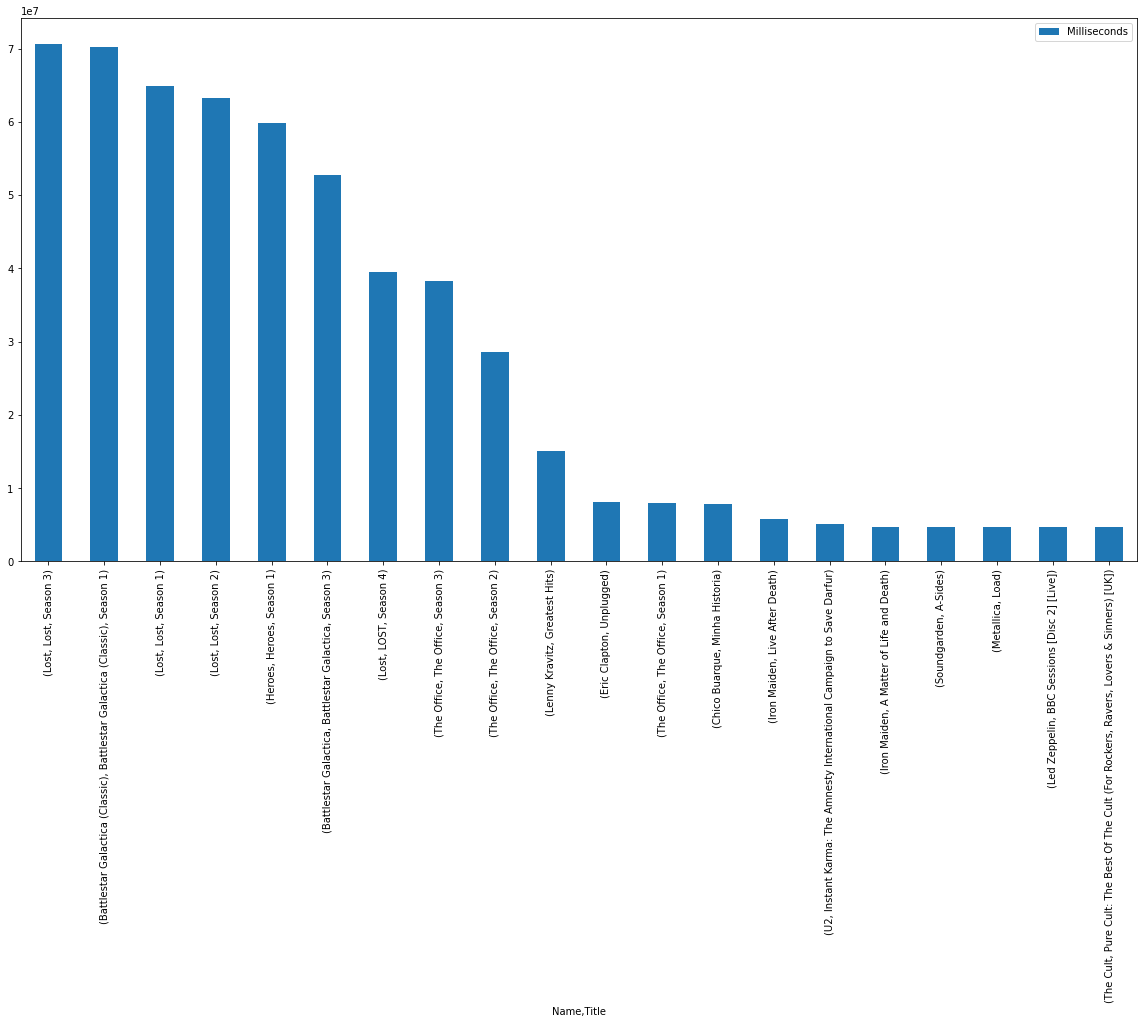

In [11]:
pivot_artists_albums_durations.sort_values('Milliseconds',ascending=False).head(20).plot(kind='bar', figsize = (20,10))

## Select only  CustomerId and email from customers table using pd.read_sql_query()

In [12]:
cutomer_emails = pd.read_sql_query("SELECT CustomerId, Email FROM customers", conn)
cutomer_emails

,CustomerId,Email
0,1,luisg@embraer.com.br
1,2,leonekohler@surfeu.de
2,3,ftremblay@gmail.com
3,4,bjorn.hansen@yahoo.no
4,5,frantisekw@jetbrains.com
5,6,hholy@gmail.com
6,7,astrid.gruber@apple.at
7,8,daan_peeters@apple.be
8,9,kara.nielsen@jubii.dk
9,10,eduardo@woodstock.com.br


## Select only  CustomerId and email from customers table  with country = USA using pd.read_sql_query()

In [13]:
cutomer_emails_usa = pd.read_sql_query("SELECT CustomerId, Email FROM customers WHERE Country='USA'", conn)
cutomer_emails_usa

,CustomerId,Email
0,16,fharris@google.com
1,17,jacksmith@microsoft.com
2,18,michelleb@aol.com
3,19,tgoyer@apple.com
4,20,dmiller@comcast.com
5,21,kachase@hotmail.com
6,22,hleacock@gmail.com
7,23,johngordon22@yahoo.com
8,24,fralston@gmail.com
9,25,vstevens@yahoo.com


## Select CustomerId, Total from invoices with the ten most important totals

In [14]:
top_10_invoices = pd.read_sql_query("SELECT CustomerId, Total FROM invoices ORDER BY Total DESC LIMIT 10", conn)
top_10_invoices

,CustomerId,Total
0,6,25.86
1,26,23.86
2,45,21.86
3,46,21.86
4,7,18.86
5,25,18.86
6,57,17.91
7,5,16.86
8,43,16.86
9,24,15.86


## Merge the two dataframes created in Q7 and Q8 by CustomerId
Study the different way of merging : inner, left and right 

In [15]:
top_invoices_usa_emails = pd.merge(top_10_invoices, cutomer_emails_usa, how='inner', on='CustomerId')
top_invoices_usa_emails

,CustomerId,Total,Email
0,26,23.86,ricunningham@hotmail.com
1,25,18.86,vstevens@yahoo.com
2,24,15.86,fralston@gmail.com
